In [3]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
from scipy.stats import mode
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Understanding Ensemble Clustering with Dummy Data
1. Introduction to Clustering
Clustering is a method used in machine learning to group data points into clusters based on their similarities. It's a type of unsupervised learning because the model is not given any labels to learn from; it discovers the structure in the data on its own.

Example: Imagine you have a bunch of fruits, and you want to group them into categories like apples, oranges, and bananas based on their characteristics like color, size, and shape.

2. Generating Dummy Data for Clustering
We need some data to play with! Let's generate some synthetic data that simulates a real-world scenario.


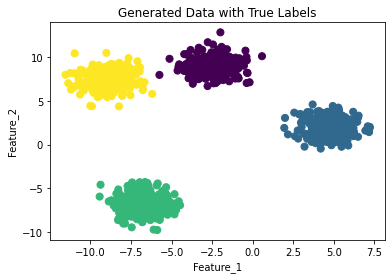

In [2]:
# Generate synthetic data with 4 clusters
data, labels = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])
df['True_Label'] = labels

# Visualize the generated data
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['True_Label'], cmap='viridis', s=50)
plt.title("Generated Data with True Labels")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

Explanation:

We used make_blobs to generate data with four distinct clusters.
Each point has two features (Feature_1 and Feature_2) and a true label (True_Label).
The scatter plot shows the data points colored by their true clusters.

# Applying Different Clustering Algorithms
We'll now apply three different clustering methods to our data: KMeans, Agglomerative Clustering, and DBSCAN. Each algorithm has its own way of grouping the data.

## 3.1 KMeans Clustering
This method divides the data into k clusters by minimizing the distance between data points and the cluster center.

In [4]:
# Step 1: Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # We set the number of clusters to 4
kmeans_labels = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])

# Step 2: Add KMeans cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Step 3: Visualize KMeans results
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title("KMeans Clustering Results")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2')
plt.show()


Explanation:

KMeans tries to place k centers (centroids) in the data and assigns points to the nearest centroid.
We specified 4 clusters, and the model grouped data points accordingly.

## 3.2 Agglomerative Clustering
This is a hierarchical clustering method that builds clusters step-by-step by merging or splitting them.

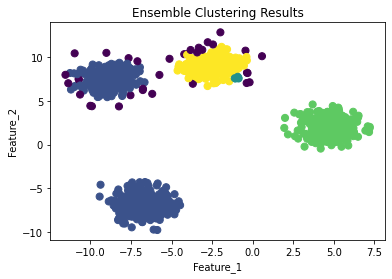

In [5]:
# Step 1: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(df[['Feature_1', 'Feature_2']])

# Step 2: Add Agglomerative cluster labels to the DataFrame
df['Agg_Cluster'] = agg_labels

# Step 3: Visualize Agglomerative Clustering results
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Agg_Cluster'], cmap='viridis', s=50)
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2')
plt.show()


Explanation:

This method starts with each data point as its own cluster and then merges them based on their similarity until only the specified number of clusters remains.

## 3.3 DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies clusters based on the density of data points. It can handle noisy data and find clusters of varying shapes and sizes.

In [6]:
# Step 1: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df[['Feature_1', 'Feature_2']])

# Step 2: Add DBSCAN cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Step 3: Visualize DBSCAN results
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2')
plt.show()


Silhouette Score: 0.2763978896185765
Adjusted Rand Index: 0.679801751845794


Explanation:

DBSCAN does not require specifying the number of clusters. It groups points that are close together and marks isolated points as noise.

# Ensemble Clustering: Combining Results
Ensemble clustering combines the results of multiple clustering algorithms to achieve better and more robust results.

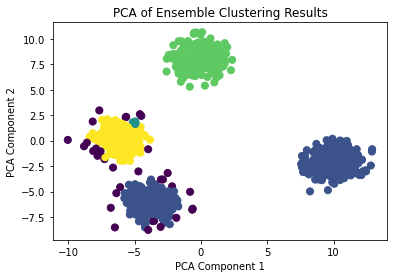

In [7]:
# Step 1: Stack the cluster labels from the three algorithms
ensemble_labels = np.vstack([kmeans_labels, agg_labels, dbscan_labels])

# Step 2: Combine the labels using majority voting (most frequent label)
final_labels, _ = mode(ensemble_labels, axis=0)

# Step 3: Add ensemble cluster labels to the DataFrame
df['Ensemble_Cluster'] = final_labels.flatten()

# Step 4: Visualize the ensemble clustering results
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Ensemble_Cluster'], cmap='viridis', s=50)
plt.title("Ensemble Clustering Results")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2')
plt.show()


Explanation:

We take the labels from all three clustering methods and use majority voting to determine the final cluster label for each data point.

# Evaluating the Clustering Performance
We use two common metrics to evaluate clustering quality: Silhouette Score and Adjusted Rand Index (ARI).

### Silhouette Score
It measures how similar an object is to its own cluster compared to other clusters. Values range from -1 to 1, where 1 indicates well-separated clusters.

In [ ]:
# Calculate Silhouette Score for ensemble clusters
sil_score = silhouette_score(df[['Feature_1', 'Feature_2']], df['Ensemble_Cluster'])
print(f'Silhouette Score: {sil_score}')

### Adjusted Rand Index (ARI)
ARI measures the similarity between the true labels and the predicted clusters, adjusting for chance grouping.

In [ ]:
# Calculate Adjusted Rand Index for ensemble clusters
ari_score = adjusted_rand_score(df['True_Label'], df['Ensemble_Cluster'])
print(f'Adjusted Rand Index: {ari_score}')

## Visualizing and Interpreting the Clusters
We use PCA (Principal Component Analysis) to reduce the dimensions of the data and visualize it in 2D.

In [ ]:
# Step 1: Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Feature_1', 'Feature_2']])

# Step 2: Visualize PCA results with ensemble clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Ensemble_Cluster'], cmap='viridis', s=50)
plt.title("PCA of Ensemble Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2')
plt.show()

Explanation:

PCA helps to reduce the high-dimensional data to 2 dimensions for easy visualization. Each color represents a different cluster.